In [18]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/MyDrive/演習プロジェクト/src') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. ライブラリのインポート**

In [19]:
!pip install japanize_matplotlib
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **2. 初期定義**

In [20]:
data_dir = '../data' # このipynbファイルから見たdataフォルダのパス
input_dir = f'{data_dir}/input' # 変数data_dirから見たinputフォルダのパス
output_dir = f'{data_dir}/output'
input_file = f'{output_dir}/transaction_processed.csv' # 加工済みデータのパス

## **3. データの読み込み**

In [21]:
df = pd.read_csv(input_file)
display(df.head())

,transaction_id,transaction_date,customer_id,product_id,count,sales,shipping_date,cancellation_date,status,customer_name,birth_date,gender,prefectures,type,product_name,brand,category,color,price
0,201904010000-1,2019-04-01,C-001213,CANB3,3,449400,2019-04-12,NaN,配達済み,押切 彩,1991-01-30,女,東京都,法人,Caps-A3,caps,ノートPC,Black,149800
1,201904010003-1,2019-04-01,C-001572,ID16,1,16300,2019-04-09,NaN,配達済み,牟田 健,1980-10-21,男,愛知県,個人,Display-16,ディスプレイ,周辺機器,NaN,16300
2,201904030001-1,2019-04-03,C-002610,INDB5,3,464400,2019-04-12,NaN,配達済み,鈴木 博志,1983-09-11,男,大阪府,法人,Inter-W5,Inter,デスクトップ,Black,154800
3,201904030001-2,2019-04-03,C-002610,IKW,6,22686,2019-04-14,NaN,配達済み,鈴木 博志,1983-09-11,男,大阪府,法人,ワイヤレスキーボード,キーボード,周辺機器,NaN,3781
4,201904040006-1,2019-04-04,C-001267,ZENB9,6,1679400,2019-04-15,NaN,配達済み,松浦 美菜子,2001-01-28,女,大阪府,個人,Zerace-J9,zerace,ノートPC,Black,279900


## **4. メイン処理 ～データ可視化～**

#### **① データの全体像を可視化しよう**



##### **指標データに関する基本的な数値を確認しよう**

In [22]:
display(df.describe())

,count,sales,price
count,8383.000000,8.383000e+03,8.383000e+03
mean,2.566265,5.015266e+05,1.959738e+05
std,2.765057,7.720293e+05,1.475995e+05
min,0.000000,0.000000e+00,1.230000e+03
25%,1.000000,1.268000e+05,1.168000e+05
50%,2.000000,2.899000e+05,1.818000e+05
75%,3.000000,5.994000e+05,2.348000e+05
max,53.000000,2.309580e+07,1.099800e+06


##### **指標データの分布を見てみよう**

(array([8.167e+03, 1.780e+02, 2.600e+01, 6.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.,  2309580.,  4619160.,  6928740.,  9238320., 11547900.,
        13857480., 16167060., 18476640., 20786220., 23095800.]),
 <a list of 10 Patch objects>)

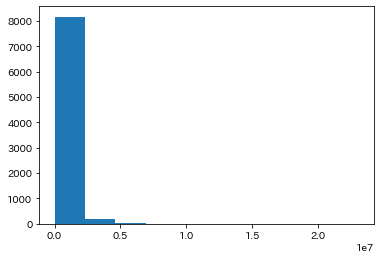

In [23]:
plt.hist(df['sales'])

(array([7.593e+03, 6.330e+02, 1.090e+02, 2.800e+01, 9.000e+00, 9.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  5.3, 10.6, 15.9, 21.2, 26.5, 31.8, 37.1, 42.4, 47.7, 53. ]),
 <a list of 10 Patch objects>)

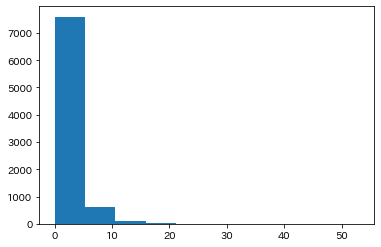

In [24]:
plt.hist(df['count'])

#### **② 様々な切り口でデータを可視化しよう**

##### **商品カテゴリごとの売上を可視化してみよう**

In [25]:
df_viz = df[['category','sales']]
df_viz = df_viz.groupby('category',as_index=False).sum()

display(df_viz)

,category,sales
0,タブレット,90168924
1,デスクトップ,2016566020
2,ノートPC,2081624480
3,周辺機器,15938163


<BarContainer object of 4 artists>

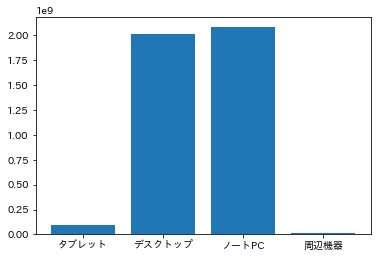

In [26]:
plt.bar(df_viz['category'], df_viz['sales'])

##### **商品カテゴリ×性別ごとの売上を可視化してみよう**

In [27]:
df_viz = df[['category','gender','sales']]
df_viz = df_viz.groupby(['category','gender'],as_index=False).sum()
df_viz = df_viz.pivot(index='gender', columns='category', values='sales')

display(df_viz)

category,タブレット,デスクトップ,ノートPC,周辺機器
gender,,,,
その他・不明,4664880,95216860,104830420,701991
女,25716758,713021160,710859800,5093893
男,59787286,1208328000,1265934260,10142279


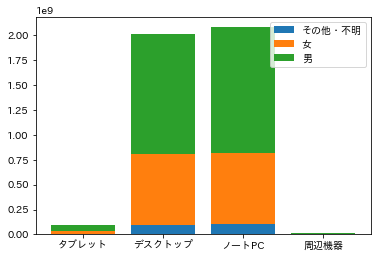

In [28]:
for i in range(len(df_viz)):
    plt.bar(df_viz.columns, df_viz.iloc[i], bottom=df_viz.iloc[0:i].sum())
plt.legend(df_viz.index)

##### **商品カテゴリ×会員区分ごとの売上を可視化してみよう**

In [29]:
df_viz = df[['category','type','sales']]
df_viz = df_viz.groupby(['category','type'],as_index=False).sum()
df_viz = df_viz.pivot(index='type', columns='category', values='sales')

display(df_viz)

category,タブレット,デスクトップ,ノートPC,周辺機器
type,,,,
個人,29799234,346097180,545832660,3837383
法人,60369690,1670468840,1535791820,12100780


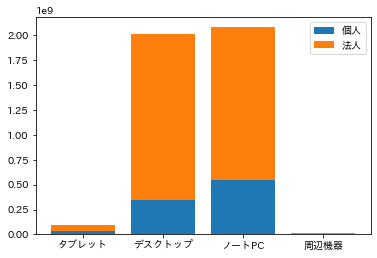

In [30]:
for i in range(len(df_viz)):
    plt.bar(df_viz.columns, df_viz.iloc[i], bottom=df_viz.iloc[0:i].sum())
plt.legend(df_viz.index)

##### **ブランド×会員区分ごとの売上を可視化してみよう**

brand,Inter,Tab,caps,puter,verge,zerace,キーボード,ディスプレイ,マウス
type,,,,,,,,,
個人,199215000,29799234,289803400,35533640,248204300,119173500,672543,2909760,255080
法人,662117000,60369690,993791400,120226660,1039114600,391011000,1690886,9354980,1054914


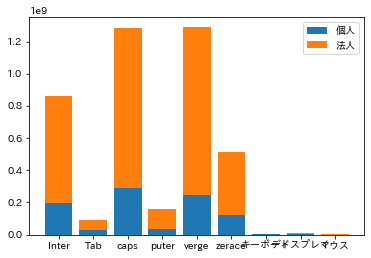

In [31]:
df_viz = df[['brand','type','sales']]
df_viz = df_viz.groupby(['brand','type'],as_index=False).sum()
df_viz = df_viz.pivot(index='type', columns='brand', values='sales')

display(df_viz)
for i in range(len(df_viz)):
    plt.bar(df_viz.columns, df_viz.iloc[i], bottom=df_viz.iloc[0:i].sum())
plt.legend(df_viz.index)

## **5. データの出力**

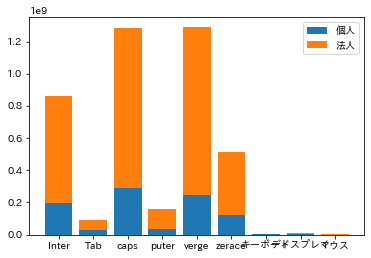

In [32]:
for i in range(len(df_viz)):
    plt.bar(df_viz.columns, df_viz.iloc[i], bottom=df_viz.iloc[0:i].sum())
plt.legend(df_viz.index)
plt.savefig(f'{output_dir}/ブランド_会員区分ごとの売上.png')